# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm



# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [5]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here


def sigmoid(x):
    '''
    Sigmoid function.
    '''
    if x>=0:
        return np.divide(1,1+ np.exp(-x))
    else:
        return np.divide(np.exp(x), 1+np.exp(x))
        
def logexp(inner_prod):
    '''
      Helper for calculating loss and loss gradient.

      Arguments :
      inner_prod : scalar 

      Returns :
      log(1+exp(inner_prod)) 

      '''
    if np.sign(inner_prod)==1:
        return inner_prod + np.log(1+np.exp(-inner_prod))
    return np.log(1+np.exp(inner_prod))
    
def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100,eps=0.03):
    r"""
    Arguments:
    X : (n,d) shape numpy array
    Y : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    kernel = 'linear' or 'rbf' or 'poly' 
    reg_param = $\lambda$
    num_iter_gd = number of GD iterations.

    Returns the result of kernel logistic regression :
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    Primal problem:
    $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    the dual of which is

    $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    where $\phi$ is the feature got by the kernel.

    Where K is the nxn kernel matrix computed on the training data.

    The kernel is defined by the kernel_param:
    If kernel=linear: K(\u,\v) = \u^\top \v  
    If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    
    """
    n = X.shape[0]
    d = X.shape[1]
    alpha = np.zeros(n) # initialisation
    if kernel=='rbf':
        X_norm = np.sum(X ** 2, axis = -1)
        I = X_norm[:,None] + X_norm[None,:] - 2*X@X.T # caldulating the matrix of inner products
    else:  
        I = X@X.T # caldulating the matrix of inner products
    K = matrix_kfunc(I,kernel,kernel_param)
    for i in range(num_iter_gd):
        inner_prods = [-Y[j]*alpha@K[:,j] for j in range(n)]
        K_factors  = [ -Y[j]*K[:,j]*sigmoid(inner_prods[j]) for j in range(n) ]
        loss_grad =  sum(K_factors)/n + reg_param*K@alpha
        if i==0:
            loss = sum([logexp(inner_prods[j])/n for j in range(n)])
            loss += reg_param *0.5*alpha.T@K@alpha
        alpha = alpha  - loss_grad*eps
    return alpha
    
    
def matrix_kfunc(I,kernel,kernel_param):
    r'''
    Computes the kernel matrix from a matrix of inner products. For example, if 
    K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    then I = X@X.T is given as input. (1+ x)**kernel_param is then computed element-wise
    
    Arguments:
    I : Two dimensional array of shape (n,m) 
    kernel : string specifying the type of kernel function to use. Should be one of 'linear', 'poly' or 'rbf'
    kernel_param : parameter to the kernel function 
    
    If kernel=linear: K(\u,\v) = \u^\top \v  
    If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    
    Returns :
    K - Kernel matrix
    '''
    if kernel == 'linear' :
        return I
    elif kernel=='poly':
        return (1+I)**kernel_param
    elif kernel == 'rbf':
        return np.exp(-kernel_param*I)

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    # compute the matrix of inner products for train_X vecs and test_X vecs
    if kernel=='rbf':
        train_X_norm = np.sum(train_X**2,axis=-1) 
        test_X_norm = np.sum(test_X**2,axis=-1)
        I = train_X_norm[:,None] + test_X_norm[None,:] - 2*train_X@test_X.T
    else :
        I = train_X@test_X.T   
    K = matrix_kfunc(I,kernel,kernel_param)
    preds = alpha.T@K
    preds = np.sign(preds)
    return preds.reshape(-1)

    
def preprocess(X,train=True):
    '''
    Data standardisation
    
    Arguments :
    X : array of shape (n,d)
    train : Bool to specify whether input is training data
    
    Returns:
    Y - standardised X
    mean - mean value of every feature. Shape (d,). Returned only if train==True
    std - std dev in each feature. Shape (d,). Returned only if train==True
    '''
    mean = np.mean(X, axis=0)
    X = X - mean.reshape((1,-1))
    std = np.std(X, axis=0)
    std = std + 1e-7
    Y = X/std
    if train :
        return Y, mean.reshape((1,-1)), std
    return Y


In [0]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

### Please note that validation can yield slightly different hyperparameters now as some results were not obtained with the same seed as mentioned. 
### However, the accuracy values vary only slightly
#### Some parameter combinations will results in NaNs, which gives zero train and val accuracy. For some cases, a reduced step size will resolve this,
###  but in general the performance will still be worse than others. Hence, if accuracy is zero, that parameter combination has been (largely) ignored.


dataset = np.load('./dataset_A.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
all_inds = np.arange(X_train.shape[0])
np.random.seed(0)
np.random.shuffle(all_inds) # Shuffling the data
X_train, Y_train = X_train[all_inds], Y_train[all_inds]

eps = 0.001
X_train,mean,std = preprocess(X_train,train=True)
X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value
batch_inds = [all_inds[250*i:250*(i+1)] for i in range(6)] # 6 fold cross validation

for kernel in ['linear','rbf','poly']:
    kernel_param_range = np.linspace(1,5,num=5)
    print(f'Validating {kernel} kernel on dataset A')
    print('==========')
    if kernel=='linear':
        kernel_param_range = [1]
    if kernel=='rbf':
        kernel_param_range = np.logspace(-3,2,num=6)
    for kernel_param in kernel_param_range:
        for reg_param in np.logspace(-4,3,num=8):
            val_accs = []
            train_accs = []
            for i in range(len(batch_inds)):
                inds = batch_inds[i]
                X_val, Y_val = X_train[inds], Y_train[inds]
                train_inds = [ind for ind in all_inds if ind not in inds]
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds] 
                alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel=kernel, kernel_param= kernel_param,
                                                       reg_param=reg_param, eps=eps)
                Y_pred = test_pred(alpha, X_train_split, Y_train_split, X_val, kernel= kernel, kernel_param= kernel_param)
                acc = (Y_pred==Y_val).sum()*1.0/len(Y_pred)
                val_accs.append(acc)
                Y_pred_train = test_pred(alpha,X_train_split,Y_train_split,X_train_split, kernel=kernel,kernel_param=kernel_param)
                train_acc = (Y_pred_train==Y_train_split).sum()*1.0/len(Y_train_split)
                train_accs.append(train_acc)
            print('Kernel :{} kernel_param = {}, eps :{}  and reg_param = {}: Validation accuracy : {}  Train accuracy : {}'.format(kernel, kernel_param,eps,reg_param,
                                                                                               np.mean(val_accs), np.mean(train_accs)))
            print('==========')
    

dataset = np.load('./dataset_B.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
all_inds = np.arange(X_train.shape[0])
np.random.seed(0)
np.random.shuffle(all_inds)

X_train, Y_train = X_train[all_inds], Y_train[all_inds]


X_train, mean, std = preprocess(X_train,train=True)
batch_inds = [all_inds[250*i:250*(i+1)] for i in range(6)] # 6 fold cross validation

num_iter_gd=300
for kernel in ['poly']:
    kernel_param_range = np.linspace(1,5,num=5)
    print(f'Validating {kernel} kernel on dataset B')
    eps = 0.01 # Setting value of step size
    if kernel=='linear':
        eps = 0.05 # Higher step size provided better results
        kernel_param_range = [1]
    if kernel=='rbf':
        kernel_param_range = np.logspace(-3,2,num=6)
    for kernel_param in kernel_param_range:
        for reg_param in np.logspace(-4,3,num=8):
            val_accs = []
            train_accs = []
            for i in range(6):
                inds = batch_inds[i]
                X_val, Y_val = X_train[inds], Y_train[inds]
                train_inds = [ind for ind in all_inds if ind not in inds]
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds] 
                alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel=kernel, kernel_param= kernel_param,
                                                       reg_param=reg_param, eps=eps,num_iter_gd=num_iter_gd)
                Y_pred = test_pred(alpha, X_train_split, Y_train_split, X_val, kernel= kernel, kernel_param= kernel_param)
                acc = (Y_pred==Y_val).sum()*1.0/len(Y_pred)
                val_accs.append(acc)
                Y_pred_train = test_pred(alpha,X_train_split,Y_train_split,X_train_split, kernel=kernel,kernel_param=kernel_param)
                train_acc = (Y_pred_train==Y_train_split).sum()*1.0/len(Y_train_split)
                train_accs.append(train_acc)
            print('Kernel :{} kernel_param = {}, eps :{}  and reg_param = {}: Validation accuracy : {}  Train accuracy : {}'.format(kernel, kernel_param,eps,reg_param,
                                                                                               np.mean(val_accs), np.mean(train_accs)))
            print('==========')
            

dataset = np.load('./dataset_C.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
all_inds = np.arange(X_train.shape[0])
np.random.seed(100)
np.random.shuffle(all_inds)

X_train, Y_train = X_train[all_inds], Y_train[all_inds]

eps = 0.001
X_train, mean, std = preprocess(X_train,train=True)
batch_inds = [all_inds[250*i:250*(i+1)] for i in range(6)] # 6 fold cross validation

for kernel in ['linear','rbf','poly']:
    kernel_param_range = np.linspace(1,5,num=5)
    print(f'Validating {kernel} kernel on dataset C')
    if kernel=='linear':
        kernel_param_range = [1]
    if kernel=='rbf':
        kernel_param_range = np.logspace(-3,2,num=6)
    for kernel_param in kernel_param_range:
        if kernel_param > 1.0:
            eps = 0.0005
        for reg_param in np.logspace(-4,3,num=8):
            val_accs = []
            train_accs = []
            for i in range(6):
                inds = batch_inds[i]
                X_val, Y_val = X_train[inds], Y_train[inds]
                train_inds = [ind for ind in all_inds if ind not in inds]
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds] 
                alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel=kernel, kernel_param= kernel_param,
                                                       reg_param=reg_param, eps=eps)
                Y_pred = test_pred(alpha, X_train_split, Y_train_split, X_val, kernel= kernel, kernel_param= kernel_param)
                acc = (Y_pred==Y_val).sum()*1.0/len(Y_pred)
                val_accs.append(acc)
                Y_pred_train = test_pred(alpha,X_train_split,Y_train_split,X_train_split, kernel=kernel,kernel_param=kernel_param)
                train_acc = (Y_pred_train==Y_train_split).sum()*1.0/len(Y_train_split)
                train_accs.append(train_acc)
            print('==========')
            print('Kernel :{} kernel_param = {}, eps :{}  and reg_param = {}: Validation accuracy : {}  Train accuracy : {}'.format(kernel, kernel_param,eps,reg_param,
                                                                                               np.mean(val_accs), np.mean(train_accs)))
            
        
dataset = np.load('./dataset_D.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
all_inds = np.arange(X_train.shape[0])
np.random.seed(200)
np.random.shuffle(all_inds)

X_train, Y_train = X_train[all_inds], Y_train[all_inds]

eps = 0.001
X_train, mean,std = preprocess(X_train,train=True)
batch_inds = [all_inds[80*i:80*(i+1)] for i in range(5)] # 5 fold cross validation

for kernel in ['linear','rbf','poly']:
    kernel_param_range = np.linspace(1,5,num=5)
    print(f'Validating {kernel} kernel on dataset D')
    print('==========')
    
    if kernel=='linear':
        kernel_param_range = [1]
    if kernel=='rbf':
        kernel_param_range = np.logspace(-3,2,num=6)
    for kernel_param in kernel_param_range:
        if kernel=='poly':
            if kernel_param > 2 :
                eps = 0.000005 # preventing overflow
        for reg_param in np.logspace(-4,3,num=8):
            val_accs = []
            train_accs = []
            for i in range(len(batch_inds)):
                inds = batch_inds[i]
                X_val, Y_val = X_train[inds], Y_train[inds]
                train_inds = [ind for ind in all_inds if ind not in inds]
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds] 
                alpha = train_pred_logistic_regression(X_train_split, Y_train_split, kernel=kernel, kernel_param= kernel_param,
                                                       reg_param=reg_param, eps=eps,num_iter_gd=200)
                Y_pred = test_pred(alpha, X_train_split, Y_train_split, X_val, kernel= kernel, kernel_param= kernel_param)
                acc = (Y_pred==Y_val).sum()*1.0/len(Y_pred)
                val_accs.append(acc)
                Y_pred_train = test_pred(alpha,X_train_split,Y_train_split,X_train_split, kernel=kernel,kernel_param=kernel_param)
                train_acc = (Y_pred_train==Y_train_split).sum()*1.0/len(Y_train_split)
                train_accs.append(train_acc)
            print('Kernel :{} kernel_param = {}, eps :{}  and reg_param = {}: Validation accuracy : {}  Train accuracy : {}'.format(kernel, kernel_param,eps,reg_param,
                                                                                               np.mean(val_accs), np.mean(train_accs)))
            print('==========')

        


Kernel :linear kernel_param = 5.0, eps :0.01  and reg_param = 0.0001: Validation accuracy : 0.8173333333333334  Train accuracy : 0.8224


In [0]:
## Umcomment to get train and test errors
# dataset = np.load('./dataset_A.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
# X_train,mean,std = preprocess(X_train,train=True)
# X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value

# # train linear kernel

# alpha = train_pred_logistic_regression(X_train,Y_train,reg_param=0.0001,num_iter_gd=100,eps=0.001)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'linear', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train,kernel=  'linear', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err A linear ',1 - train_acc)
# print('test err A linear :  ',1-acc)


# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'poly', kernel_param= 3,reg_param=0.01,\
#                                        num_iter_gd=600,eps=0.001)
# preds = test_pred(alpha, X_train, Y_train, test_samples, kernel=  'poly', kernel_param= 3)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'poly', kernel_param= 3)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'poly', kernel_param= 3)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err A poly ',1 - train_acc)
# print('test err A poly :  ',1-acc)


# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'rbf', kernel_param= 10,reg_param=0.0001,\
#                                        eps=0.01,num_iter_gd=100)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'rbf', kernel_param= 10)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'rbf', kernel_param= 10)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err A rbf ',1 - train_acc)
# print('test err A rbf :  ',1-acc)

# dataset = np.load('./dataset_B.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)


# alpha = train_pred_logistic_regression(X_train,Y_train,reg_param=0.0001,num_iter_gd=300,eps=0.05)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'linear', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'linear', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err B  linear',1 - train_acc)
# print('test err B linear :  ',1-acc)


# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'poly', kernel_param= 1,reg_param=0.0001,\
#                                        num_iter_gd=300,eps=0.01)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'poly', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'poly', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err B poly ',1 - train_acc)
# print('test err B poly :  ',1-acc)

# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'rbf', kernel_param= 1,reg_param=0.01,\
#                                        num_iter_gd=300,eps=0.01)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'rbf', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'rbf', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err B  ',1 - train_acc)
# print('test err B rbf :  ',1-acc)

# dataset = np.load('./dataset_C.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
# X_train,mean,std = preprocess(X_train,train=True)
# X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value


# alpha = train_pred_logistic_regression(X_train,Y_train,reg_param=0.0001,num_iter_gd=300,eps=0.001)
# X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))


# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'linear', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'linear', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err C linear ',1 - train_acc)
# print('test err C linear :  ',1-acc)


# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'poly', kernel_param= 2,reg_param=0.0001,\
#                                        num_iter_gd=300,eps=0.001) # tried this wan 
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'poly', kernel_param= 2)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'poly', kernel_param= 2)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err C  poly',1 - train_acc)
# print('test err C poly :  ',1-acc)


# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'rbf', kernel_param= 1,reg_param=1000,\
#                                        num_iter_gd=300,eps=0.001)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'rbf', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'rbf', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err C rbf ',1 - train_acc)
# print('test err C rbf :  ',1-acc)

# dataset = np.load('./dataset_D.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
# X_train,mean,std = preprocess(X_train,train=True)
# X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value


# alpha = train_pred_logistic_regression(X_train,Y_train,reg_param=0.1,num_iter_gd=300,eps=0.001)
# X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
# # print('test_samples: ', test_samples.shape)


# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'linear', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'linear', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err D linear ',1 - train_acc)
# print('test err D linear :  ',1-acc)


# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'poly', kernel_param= 1,reg_param=0.1,\
#                                        num_iter_gd=300,eps=0.001) # tried this wan 
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'poly', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'poly', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err D poly ',1 - train_acc)
# print('test err D poly :  ',1-acc)


# alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'rbf', kernel_param= 1,reg_param=10,\
#                                        num_iter_gd=300,eps=0.001)
# Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'rbf', kernel_param= 1)
# Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'rbf', kernel_param= 1)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err D rbf ',1 - train_acc)
# print('test err D rbf :  ',1-acc)

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
## Implementation Comments 
Data standardisation was performed as it helped in preventing overflow issues. Also note that the seed was not properly set for some experiments and thus validation parameters quoted may not be the same across runs. However, the change in perfomance is negligible.

# Observations  


**Dataset A** : 
  - This dataset requires a non-linear decision boundary to separate the classes. Hence the linear kernel performs much worse than the other two kernel choices. 
  - For the RBF kernel, the train error and test error are rather small due to the fact that this model can learn highly non-linear decision boundaries. 
  -For the polynomial kernel, it was noticed that even polynomials performed far worse than odd polynomials (with and without data standardisation). This is because the boundary required is (close to) an odd function.

**Dataset B** :
  - For this dataset, a linear boundary is the best that can be done to separate the classes. Thus, all three kernels have comparable performance.
  - The best performing polynomial kernel was one of degree 1, with other degrees sometimes performing much worse.
  -  In general, optimisation was harder, as datapoints belonging to different classes are intermixed and there is no "perfect" solution (The optimisation landscape will not be too steep in any direction). Thus, relatively higher values of step size and gradient iterations were needed.

**Dataset C** :
  - This is a dataset with 64 features per datapoint and thus the true nature of the dataset would be harder to comment on.
  - Better performance was achieve with non-linear decision boundaries, indicating that the data is not linearly separable by a hyperplane in the 64-dim space.

**Dataset D** :
  - In this case, there are 30 features per datapoint, and only 400 train samples, compared to 1500 train samples present for the rest. A general trend was that the regularisation parameter was higher, validating the fact that with lesser training data, higher regularisation provides better test (validation) accuracy.
  - The performance of linear and polynomial kernel was comparable. This indicates that the best decision boundary is *probably* close to a hyperplane. 
  

# Train and test error

The train and test zero-one errors (normalised) are summarised in the table below :

<table>
<tr><th>Train error for different kernel choices </th><th>Test error for different kernel choices</th></tr>
<tr><td>



|Kernel | Dataset A| Dataset B | Dataset C | Dataset D | 
|---|---|---|---|---|
|Linear| 0.124|  0.1753 | 0.0707| 0.060  | 
| RBF| 0.0013 | 0.1740 |0.0 | 0.0 |
|Poly |0.0027 | 0.1733 | 0.0173 | 0.060 |

</td><td>


|Kernel | Dataset A| Dataset B | Dataset C | Dataset D | 
|---|---|---|---|---|
|Linear|0.132|  0.200 |0.0976|  0.071 | 
| RBF| 0.004 | 0.1960 | 0.037|  0.0355 |
|Poly |0.0040 | 0.1980|0.0841 | 0.0650 |
</td></tr> </table> 

# Hyperparameter choices 

Hyperparameter choices for different datasets and kernel choices are given below.  For each dataset, k-fold cross validation was performed ($k=6$ for datasets A,B,C and $k=5$ for dataset D). The range of values over which different parameters were sweeped were:
- *reg_param* : 1e-4 to 1e3 on a log scale (base 10)
- *kernel_param* : 
  - Poly kernel : {1,2,3,4,5} Larger values usually led to overfitting and hence weren't tried.
  - RBF kernel : 1e-3 to 1e2 on a log scale (base 10)

The best hyperparameters were chosen based on the average validation accuracy (on cross validation). Note that after choosing the best performing parameters, further tuning of step size (*eps*) and number of gradient descent iterations (*num_iter_gd*) was done. (Ideally, the step size should also be chosen by cross validation) . In cases where multiple combinations gave similar/same validation accuracies, the 'simpler' model (less prone to overfitting) was chosen.

<table>
<tr><th>Dataset A </th><th>Dataset B</th></tr>
<tr><td>



|Kernel | kernel_param| reg_param | eps | num_iter_gd
|---|---|---|---|---|
|Linear|- | 0.0001 | 0.001 | 100 |
| RBF| 10 | 0.0001 | 0.01 | 100 |
|Poly |3 | 0.01 | 0.001 | 600 |

</td><td>


|Kernel | kernel_param| reg_param | eps | num_iter_gd
|---|---|---|---|---|
|Linear|-| 0.0001 | 0.05 |  300|
| RBF| 1| 0.01 | 0.01 | 300 |
|Poly |1 | 0.0001 | 0.01 | 300 | 


</td></tr> </table>  

</td></tr> </table>  


<table>
<tr><th>Dataset C </th><th>Dataset D</th></tr>
<tr><td>



|Kernel | kernel_param| reg_param | eps | num_iter_gd
|---|---|---|---|---|
|Linear|-| 0.0001 | 0.001 | 300 |
| RBF| 1 | 1000 | 0.001 | 300 |
|Poly |2 | 0.0001 | 0.001 | 300 |

</td><td>


|Kernel | kernel_param| reg_param | eps | num_iter_gd
|---|---|---|---|---|
|Linear|-| 0.1 | 0.001 | 300 |
| RBF| 1| 10 | 0.001 |300 |
|Poly |1 | 0.1 | 0.001 | 300 |


</td></tr> </table>  





<Figure size 432x288 with 0 Axes>

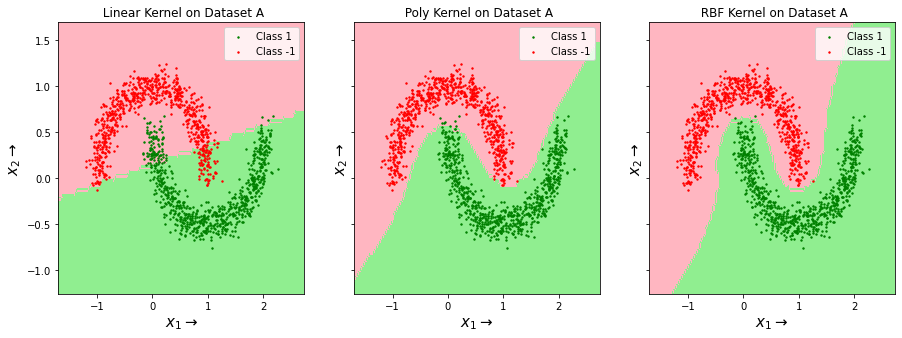

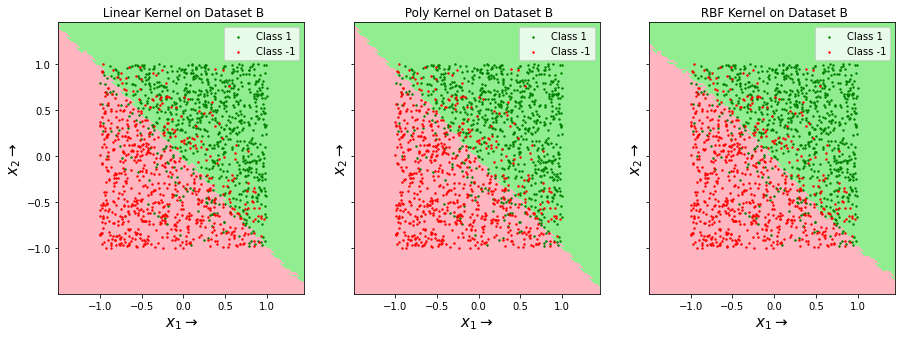

In [0]:
  ### Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

dataset = np.load('./dataset_A.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
X_train,mean,std = preprocess(X_train,train=True)
X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value

# train linear kernel

alpha = train_pred_logistic_regression(X_train,Y_train,reg_param=0.0001,num_iter_gd=100,eps=0.001)

X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
test_samples = (test_samples-mean)/std
preds = test_pred(alpha, X_train, Y_train, test_samples, kernel=  'linear', kernel_param= 1)

Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'linear', kernel_param= 1)
Y_pred_train = test_pred(alpha, X_train, Y_train, X_train,kernel=  'linear', kernel_param= 1)
train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)
# print('train err A linear ',1 - train_acc)
# print('test err A linear :  ',1-acc)


plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
test_samples = test_samples*std.reshape((1,-1)) + mean
X_train = X_train*std.reshape((1,-1)) + mean

ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Linear Kernel on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() # plt.subplot(1,3,2)

X_train = (X_train - mean.reshape((1,-1)))/std
test_samples = (test_samples-mean.reshape((1,-1)))/std

alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'poly', kernel_param= 3,reg_param=0.01,\
                                       num_iter_gd=600,eps=0.001)
preds = test_pred(alpha, X_train, Y_train, test_samples, kernel=  'poly', kernel_param= 3)
Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'poly', kernel_param= 3)
Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'poly', kernel_param= 3)
train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)

test_samples = test_samples*std.reshape((1,-1)) + mean
X_train = X_train*std.reshape((1,-1)) + mean
ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Poly Kernel on Dataset A')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend() # plt.subplot(1,3,2)

X_train = (X_train - mean.reshape((1,-1)))/std
test_samples = (test_samples-mean.reshape((1,-1)))/std

alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'rbf', kernel_param= 10,reg_param=0.0001,\
                                       eps=0.01,num_iter_gd=200)
preds = test_pred(alpha, X_train, Y_train, test_samples, kernel=  'rbf', kernel_param= 10)
Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'rbf', kernel_param= 10)
Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'rbf', kernel_param= 10)
train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)

test_samples = test_samples*std.reshape((1,-1)) + mean
X_train = X_train*std.reshape((1,-1)) + mean

ax3.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax3.set_title(' RBF Kernel on Dataset A')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend() # plt.subplot(1,3,2)

## Dataset B. Note that here data normalisation wasn't performed as unnormalised data gave better results (validation)
dataset = np.load('./dataset_B.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)


alpha = train_pred_logistic_regression(X_train,Y_train,reg_param=0.0001,num_iter_gd=300,eps=0.05)
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

preds = test_pred(alpha, X_train, Y_train, test_samples, kernel=  'linear', kernel_param= 1)
Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'linear', kernel_param= 1)
Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'linear', kernel_param= 1)
train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)


plt.figure(1)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))

ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Linear Kernel on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() # plt.subplot(1,3,2)


alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'poly', kernel_param= 1,reg_param=0.0001,\
                                       num_iter_gd=300,eps=0.01)
preds = test_pred(alpha, X_train, Y_train, test_samples, kernel=  'poly', kernel_param= 1)
Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'poly', kernel_param= 1)
Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'poly', kernel_param= 1)
train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)

ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Poly Kernel on Dataset B')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend() # plt.subplot(1,3,2)


alpha = train_pred_logistic_regression(X_train,Y_train,kernel=  'rbf', kernel_param= 1,reg_param=0.01,\
                                       num_iter_gd=300,eps=0.01)
preds = test_pred(alpha, X_train, Y_train, test_samples, kernel=  'rbf', kernel_param= 1)
Y_pred = test_pred(alpha, X_train, Y_train, X_test, kernel=  'rbf', kernel_param= 1)
Y_pred_train = test_pred(alpha, X_train, Y_train, X_train, kernel=  'rbf', kernel_param= 1)
train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
acc = (Y_pred==Y_test).sum()*1.0/len(Y_test)

ax3.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax3.set_title(' RBF Kernel on Dataset B')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend() # plt.subplot(1,3,2)



plt.show()


# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [6]:
# CodeWrite cell
# Write SVM classifier using SKlearn
# write only functions here


def svm_train(X_train, Y_train, kernel='linear', kernel_param=1, C=1.0):
    '''
    Trains an SVM model with the given kernel and reg parameters

    Arguments :
    X_train : train feature vectors of shape (n,d)
    Y_train : labels. shape (d,)
    kernel : string to specify which kernel type to use. One of linear, poly or rbf
    kernel_param : kernel parameter to use.
    C : regularisation parameter

    Returns :
    clf : classifier object

    '''
    if kernel == 'linear':
        clf = svm.SVC(C=C, kernel=kernel)
    elif kernel == 'poly':
        clf = svm.SVC(C=C, kernel=kernel, degree=kernel_param)
    elif kernel == 'rbf':
        clf = svm.SVC(C=C, kernel=kernel, gamma=kernel_param)
    else:
        raise ValueError(
            'Invalid kernel type. Please choose one of linear, rbf or poly')
    clf.fit(X_train, Y_train)
    # print('Classes : ',clf.classes_)
    return clf


def svm_test(clf, X_test):
    '''
    Returns predictions of an SVM model on test data

    Arguments :
    clf - trained SVM classifier
    X_test - test data

    Returns:
    Predictions on X_test

    '''
    dec = clf.decision_function(X_test)
    # print(dec)
    if len(clf.classes_) == 2:
        return np.sign(dec)
    return np.argmax(dec, axis=1)


In [7]:
# CodeWrite cell
# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set.
# Also for generating the numbers that you report below.

# Please note that validation can yield slightly different hyperparameters now as some results were not obtained with the same seed as mentioned.
# However, the accuracy values vary only slightly.

dataset_str = './dataset_A.npz'
dataset = np.load(dataset_str)
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
all_inds = np.arange(X_train.shape[0])
np.random.shuffle(all_inds)
X_train, Y_train = X_train[all_inds], Y_train[all_inds]
X_train, mean, std = preprocess(X_train, train=True)


batch_inds = [all_inds[250*i:250*(i+1)] for i in range(6)]

for kernel in ['linear', 'rbf', 'poly']:
    kernel_param_range = np.linspace(1, 5, num=5)
    print(f'Validating {kernel} kernel and dataset A')
    if kernel == 'linear':
        kernel_param_range = [1]
    if kernel == 'rbf':
        kernel_param_range = np.logspace(-3, 2, num=6)
    for kernel_param in kernel_param_range:
        for C in np.logspace(-3, 3, num=7):
            val_accs = []
            train_accs = []
            for i in range(6):
                val_inds = batch_inds[i]
                X_val, Y_val = X_train[val_inds], Y_train[val_inds]
                train_inds = [ind for ind in all_inds if ind not in val_inds]
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds]
                clf = svm_train(X_train_split, Y_train_split,
                                kernel=kernel, kernel_param=kernel_param, C=C)
                Y_pred = svm_test(clf, X_val)
                Y_pred_train = svm_test(clf, X_train_split)
                train_acc = (Y_pred_train == Y_train_split).sum() * \
                    1.0/len(Y_train_split)
                train_accs.append(train_acc)
                acc = (Y_pred == Y_val).sum()/len(Y_pred)
                val_accs.append(acc)
            print('==========')
            print('Kernel :{} Kernel param : {} Regulisation param C : {} Validation accuracy: {} Train accuracy : {}'.format(
                kernel, kernel_param, C, np.mean(val_accs), np.mean(train_accs)))
        print('===================')

dataset_str = './dataset_B.npz'
dataset = np.load(dataset_str)
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
all_inds = np.arange(X_train.shape[0])
np.random.shuffle(all_inds)
X_train, Y_train = X_train[all_inds], Y_train[all_inds]
X_train, mean, std = preprocess(X_train, train=True)


batch_inds = [all_inds[250*i:250*(i+1)] for i in range(6)]

for kernel in ['linear', 'rbf', 'poly']:
    kernel_param_range = np.linspace(1, 5, num=5)
    print(f'Validating {kernel} kernel and dataset B')
    if kernel == 'linear':
        kernel_param_range = [1]
    if kernel == 'rbf':
        kernel_param_range = np.logspace(-3, 2, num=6)
    for kernel_param in kernel_param_range:
        # kernel_param = 1
        for C in np.logspace(-3, 3, num=7):
            val_accs = []
            train_accs = []
            for i in range(6):
                val_inds = batch_inds[i]
                X_val, Y_val = X_train[val_inds], Y_train[val_inds]
                train_inds = [ind for ind in all_inds if ind not in val_inds]
                # print(len(train_inds))
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds]
                clf = svm_train(X_train_split, Y_train_split,
                                kernel=kernel, kernel_param=kernel_param, C=C)
                Y_pred = svm_test(clf, X_val)
                Y_pred_train = svm_test(clf, X_train_split)
                train_acc = (Y_pred_train == Y_train_split).sum() * \
                    1.0/len(Y_train_split)
                train_accs.append(train_acc)
                acc = (Y_pred == Y_val).sum()/len(Y_pred)
                val_accs.append(acc)
            print('==========')
            print('Kernel :{} Kernel param : {} Regulisation param C : {} Validation accuracy: {} Train accuracy : {}'.format(
                kernel, kernel_param, C, np.mean(val_accs), np.mean(train_accs)))
        print('===================')

dataset_str = './dataset_C.npz'
dataset = np.load(dataset_str)
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
all_inds = np.arange(X_train.shape[0])
np.random.shuffle(all_inds)
X_train, Y_train = X_train[all_inds], Y_train[all_inds]
print(X_train.shape)
X_train, _, _ = preprocess(X_train)


batch_inds = [all_inds[250*i:250*(i+1)] for i in range(6)]

for kernel in ['linear', 'rbf', 'poly']:
    kernel_param_range = np.linspace(1, 5, num=5)
    print(f'Validating {kernel} kernel and dataset C')
    if kernel == 'linear':
        kernel_param_range = [1]
    if kernel == 'rbf':
        kernel_param_range = np.logspace(-3, 2, num=6)
    for kernel_param in kernel_param_range:
        # kernel_param = 1
        for C in np.logspace(-3, 3, num=7):
            val_accs = []
            train_accs = []
            for i in range(6):
                val_inds = batch_inds[i]
                X_val, Y_val = X_train[val_inds], Y_train[val_inds]
                train_inds = [ind for ind in all_inds if ind not in val_inds]
                # print(len(train_inds))
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds]
                clf = svm_train(X_train_split, Y_train_split,
                                kernel=kernel, kernel_param=kernel_param, C=C)
                Y_pred = svm_test(clf, X_val)
                Y_pred_train = svm_test(clf, X_train_split)
                train_acc = (Y_pred_train == Y_train_split).sum() * \
                    1.0/len(Y_train_split)
                train_accs.append(train_acc)
                acc = (Y_pred == Y_val).sum()/len(Y_pred)
                val_accs.append(acc)
            print('==========')
            print('Kernel :{} Kernel param : {} Regulisation param C : {} Validation accuracy: {} Train accuracy : {}'.format(
                kernel, kernel_param, C, np.mean(val_accs), np.mean(train_accs)))
        print('===================')

dataset_str = './dataset_D.npz'
dataset = np.load(dataset_str)
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
all_inds = np.arange(X_train.shape[0])
np.random.shuffle(all_inds)
X_train, Y_train = X_train[all_inds], Y_train[all_inds]
print(X_train.shape)
X_train, mean, std = preprocess(X_train, train=True)
batch_inds = [all_inds[80*i:80*(i+1)] for i in range(5)]


for kernel in ['linear', 'rbf', 'poly']:
    kernel_param_range = np.linspace(1, 5, num=5)
    print(f'Validating {kernel} kernel and dataset D')
    if kernel == 'linear':
        kernel_param_range = [1]
    if kernel == 'rbf':
        kernel_param_range = np.logspace(-3, 2, num=6)
    for kernel_param in kernel_param_range:
        # kernel_param = 1
        for C in np.logspace(-3, 3, num=7):
            val_accs = []
            train_accs = []
            for i in range(5):
                val_inds = batch_inds[i]
                X_val, Y_val = X_train[val_inds], Y_train[val_inds]
                train_inds = [ind for ind in all_inds if ind not in val_inds]
                # print(len(train_inds))
                X_train_split, Y_train_split = X_train[train_inds], Y_train[train_inds]
                clf = svm_train(X_train_split, Y_train_split,
                                kernel=kernel, kernel_param=kernel_param, C=C)
                Y_pred = svm_test(clf, X_val)
                Y_pred_train = svm_test(clf, X_train_split)
                train_acc = (Y_pred_train == Y_train_split).sum() * \
                    1.0/len(Y_train_split)
                train_accs.append(train_acc)
                acc = (Y_pred == Y_val).sum()/len(Y_pred)
                val_accs.append(acc)
            print('==========')
            print('Kernel :{} Kernel param : {} Regulisation param C : {} Validation accuracy: {} Train accuracy : {}'.format(
                kernel, kernel_param, C, np.mean(val_accs), np.mean(train_accs)))
        print('===================')



FileNotFoundError: [Errno 2] No such file or directory: './dataset_A.npz'

In [0]:
## code block for obtaining train and test errors
# dataset = np.load('./dataset_A.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
# X_train,mean,std = preprocess(X_train,train=True)
# clf = svm_train(X_train,Y_train,kernel='linear', kernel_param = 1,C=10)
# X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('A Linear test', 1-acc)
# print('A Linear train', 1-train_acc)



# clf = svm_train(X_train,Y_train,kernel='rbf', kernel_param = 1,C=10)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('A RBF test', 1-acc)
# print('A RBF train', 1-train_acc)



# clf = svm_train(X_train,Y_train,kernel='poly', kernel_param = 5,C=1000)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('A POLY test', 1-acc)
# print('A POLY train', 1-train_acc)


# dataset = np.load('./dataset_B.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
# X_train,mean,std = preprocess(X_train,train=True)
# X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value


# clf = svm_train(X_train,Y_train,kernel='linear', kernel_param = 1,C=0.01)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('B Linear test ', 1-acc)
# print('B Linear train ', 1-train_acc)


# clf = svm_train(X_train,Y_train,kernel='rbf', kernel_param = 0.01,C=1.0)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('B rbf test ', 1-acc)
# print('B rbf train ', 1-train_acc)


# clf = svm_train(X_train,Y_train,kernel='poly', kernel_param = 1,C=1.0)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('B poly test ', 1-acc)
# print('B poly train ', 1-train_acc)


# dataset = np.load('./dataset_C.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
# X_train,mean,std = preprocess(X_train,train=True)
# X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value


# clf = svm_train(X_train,Y_train,kernel='linear', kernel_param = 1,C=0.1)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('C Linear test ', 1-acc)
# print('C Linear train ', 1-train_acc)


# clf = svm_train(X_train,Y_train,kernel='rbf', kernel_param = 0.01,C=10)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('C rbf test ', 1-acc)
# print('C rbf train ', 1-train_acc)

# clf = svm_train(X_train,Y_train,kernel='poly', kernel_param = 3,C=10)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('C poly test ', 1-acc)
# print('C poly train ', 1-train_acc)


# dataset = np.load('./dataset_D.npz') 
# X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
# X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
# X_train,mean,std = preprocess(X_train,train=True)
# X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value


# clf = svm_train(X_train,Y_train,kernel='linear', kernel_param = 1,C=0.01)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('D linear test ', 1-acc)
# print('D linear train ', 1-train_acc)


# clf = svm_train(X_train,Y_train,kernel='rbf', kernel_param = 0.001,C=10)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('D rbf test ', 1-acc)
# print('D rbf train ', 1-train_acc)

# clf = svm_train(X_train,Y_train,kernel='poly', kernel_param = 1,C=10)
# Y_pred = svm_test(clf, X_test)
# acc = (Y_pred==Y_test).sum()/len(Y_test)
# Y_pred_train = svm_test(clf, X_train)
# train_acc = (Y_pred_train==Y_train).sum()/len(Y_train)
# print('D poly test ', 1-acc)
# print('D poly train ', 1-train_acc)


D poly test  0.023668639053254448
D poly train  0.012499999999999956


TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
#Observations 
**Dataset A** :
  - The data in this case is separable by a non-linear boundary. Thus, there is a clear distinction in performance of linear vs the poly and RBF kernels
  - One can notice that the regularisation parameter C is high for all the kernels (for best-performing models). This is the hard-margin SVM regime. This is because of the fact that the data is completely separable.

**Dataset B** :
  - The data in this case is not separable, regardless of the capacity of the model. One can also observe (from the plots) that an approximately linear decision boundary is what would separate the data best. This is validated by the comparable performance of all kernel choices.
  - One can notice that the C values are relatively lower for this dataset, indicating that soft-margin SVMs perform better in this case.

**Dataset C**  :
  - The data in this case is in a 64 dimensional space. From the perfect accuracies of the poly and rbf kernels, one can say that a non-linear decision boundary can completely separate the data.
  - The regularisation parameters for poly and rbf kernels are high, indicating that hard margin SVMs perform better, which is clearly the case for separable data.

**Dataset D** :
  - The data in this case is in a 30 dimensional space. From the performance of the three kernels, the data is *probably* not completely separable.
  - The performance of all three kernel choices is similar, with the best polynomial being a linear one. Thus, the best decision boundary seems to be a hyperplane in the 30-dim space.


# Train and test error

The train and test zero-one errors (normalised) are summarised in the table below :

<table>
<tr><th>Train error for different kernel choices </th><th>Test error for different kernel choices</th></tr>
<tr><td>



|Kernel | Dataset A| Dataset B | Dataset C | Dataset D | 
|---|---|---|---|---|
|Linear|0.1287| 0.1747 |0.0653 |  0.015 | 
| RBF| 0.0 | 0.1753 | 0.0| 0.02 |
|Poly |0.0787 | 0.1773 | 0.0 |  0.0125 |

</td><td>


|Kernel | Dataset A| Dataset B | Dataset C | Dataset D | 
|---|---|---|---|---|
|Linear|0.134| 0.1980 |0.1111 |  0.01775 | 
| RBF| 0.002 | 0.1980 | 0.2020|  0.02367 |
|Poly |0.0920 | 0.2080 |0.0404 | 0.02367 |




</td></tr> </table> 

# Hyperparameter choices

The hyperparameters chosen for different datasets are given below. For each dataset, k-fold cross validation was performed ($k=6$ for datasets A,B,C and $k=5$ for dataset D). The range of values over which different parameters were sweeped were:
- *reg_param* : 1e-4 to 1e3 on a log scale (base 10)
- *kernel_param* : 
  - Poly kernel : {1,2,3,4,5} Larger values usually led to overfitting and hence weren't tried.
  - RBF kernel : 1e-3 to 1e2 on a log scale (base 10)

The best hyperparameters were chosen based on the average validation accuracy (on cross validation)

<table>
<tr><th>Dataset A </th><th>Dataset B</th></tr>
<tr><td>



|Kernel | kernel_param| reg_param |
|---|---|---|
|Linear|1| 10 |
| RBF| 1 | 10 |
|Poly |5 | 1000 | 

</td><td>


|Kernel | kernel_param| reg_param |
|---|---|---|
|Linear|1| 0.01 |
| RBF| 0.01| 1 |
|Poly |1 | 1 | 


</td></tr> </table>  

</td></tr> </table>  


<table>
<tr><th>Dataset C </th><th>Dataset D</th></tr>
<tr><td>



|Kernel | kernel_param| reg_param |
|---|---|---|
|Linear|1| 0.1 |
| RBF| 0.01 | 10 |
|Poly |3 | 10 | 

</td><td>


|Kernel | kernel_param| reg_param |
|---|---|---|
|Linear|1| 0.01 |
| RBF| 0.001| 10 |
|Poly |1 | 10 | 


</td></tr> </table>  



<Figure size 432x288 with 0 Axes>

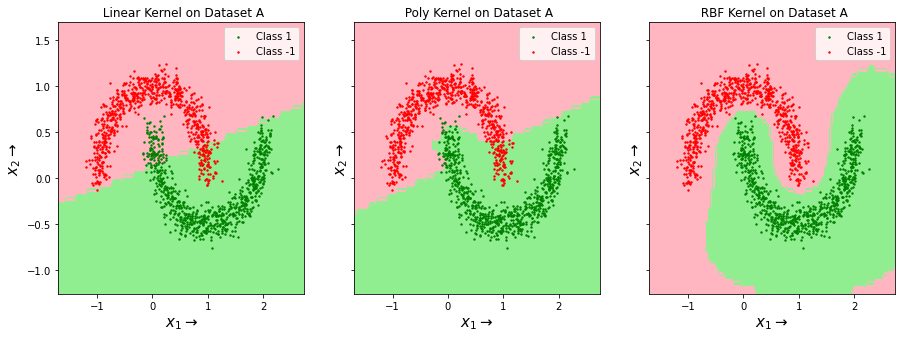

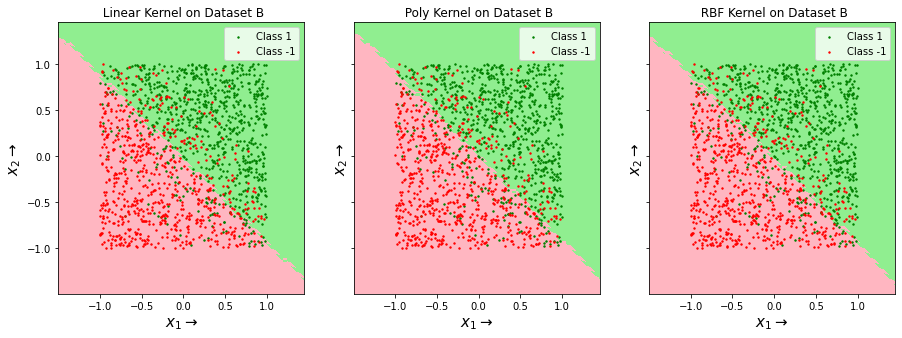

In [0]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

dataset = np.load('./dataset_A.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
X_train,mean,std = preprocess(X_train,train=True)
X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value


clf = svm_train(X_train,Y_train,kernel='linear',C=10)
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
test_samples = (test_samples-mean)/std

preds = svm_test(clf, test_samples)

Y_pred = svm_test(clf, X_test)
# print('\n\n\nAccuracy with Linear kernel on Dataset A : ',(Y_pred==Y_test).sum()*1.0/len(Y_test),'\n\n\n')

plt.figure(0)
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
test_samples = test_samples*std.reshape((1,-1)) + mean
X_train = X_train*std + mean

ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Linear Kernel on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() # plt.subplot(1,3,2)

X_train = (X_train -  mean)/std
test_samples = (test_samples-mean)/std
clf = svm_train(X_train,Y_train,kernel='poly', kernel_param= 5,C=1000.0)
Y_pred = svm_test(clf, X_test)
preds = svm_test(clf, test_samples)

# print('\n\n\nAccuracy with Poly kernel on A: ',(Y_pred==Y_test).sum()*1.0/len(Y_test),'\n\n\n')

test_samples = test_samples*std + mean
X_train = X_train*std + mean
ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Poly Kernel on Dataset A')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend() # plt.subplot(1,3,2)

X_train = (X_train -  mean)/std
test_samples = (test_samples-mean)/std
clf = svm_train(X_train,Y_train,kernel='rbf', kernel_param= 1, C=10.0)
Y_pred = svm_test(clf, X_test)
preds = svm_test(clf, test_samples)
# print('\n\n\nAccuracy with RBF on A: ',(Y_pred==Y_test).sum()*1.0/len(Y_test),'\n\n\n')

test_samples = test_samples*std + mean
X_train = X_train*std + mean
ax3.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax3.set_title(' RBF Kernel on Dataset A')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend() 

# plt.subplot(1,3,2)

dataset = np.load('./dataset_B.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
X_train,mean,std = preprocess(X_train,train=True)
X_test = (X_test - mean)/std # normalise test data with the same mean and std dev value


clf = svm_train(X_train,Y_train,kernel='linear',C=0.01)
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)
test_samples = (test_samples-mean)/std

preds = svm_test(clf, test_samples)

Y_pred = svm_test(clf, X_test)
# print('\n\n\nAccuracy with linear on B: ',(Y_pred==Y_test).sum()*1.0/len(Y_test),'\n\n\n')

plt.figure(1)
test_samples = test_samples*std + mean
X_train = X_train*std + mean
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharex=False,sharey=True,figsize=(15,5))
ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Linear Kernel on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend() # plt.subplot(1,3,2)

X_train = (X_train -  mean)/std
test_samples = (test_samples-mean)/std
clf = svm_train(X_train,Y_train,kernel='poly', kernel_param=1.0,C=1.0 )
Y_pred = svm_test(clf, X_test)
preds = svm_test(clf, test_samples)

# print('\n\n\nAccuracy with poly on B: ',(Y_pred==Y_test).sum()*1.0/len(Y_test),'\n\n\n')

test_samples = test_samples*std + mean
X_train = X_train*std + mean
ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Poly Kernel on Dataset B')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend() # plt.subplot(1,3,2)

X_train = (X_train -  mean)/std
test_samples = (test_samples-mean)/std
clf = svm_train(X_train,Y_train,kernel='rbf', kernel_param=0.01,C=1)
Y_pred = svm_test(clf, X_test)
preds = svm_test(clf, test_samples)
# print('\n\n\nAccuracy with RBF on B: ',(Y_pred==Y_test).sum()*1.0/len(Y_test),'\n\n\n')

test_samples = test_samples*std + mean
X_train = X_train*std + mean
ax3.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax3.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax3.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax3.set_title(' RBF Kernel on Dataset B')
ax3.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax3.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax3.legend() # plt.subplot(1,3,2)



# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [0]:
# CodeWrite cell
# Write Decision tree classifier from scratch,
# write only functions here (you may write extra functions here if you wish)


class Node:
    """
    Class for a node in a decision tree.
    -----------------------------
    Attributes
        predicted_class : int
            Class to predict for a given node. Is accessible
            only if the Node is a leaf node. Classes: {-1,1}
        feature_index : int, default=0
            feature index at which the threshold to split is determined
        threshold : float, default=0
            threshold value to separate points to the left of the
            node from those to its right
        left : Node, default=None 
            Node connected to the left of the current node. 
        right : Node, default=None
            Node connected to the right of the current node.                     
    """
    def __init__(self, predicted_class):
        """
        Constructor of the Node class.
        -----------------------------
        Arguments
            predicted_class : int
                Class to predict for a given node. Is accessible
                only if the Node is a leaf node. Classes: {-1,1}
        -----------------------------
        Returns
            None
        """
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None


class DecisionTreeClassifier:
    """
    Class for a decision tree classifier.
    -----------------------------
    Attributes
        num_nodes_stop : int, default=1
            number of data points in a node at which we stop splitting further
        criterion : str, default='entropy'
            criterion to split the data during training. can be either 'entropy' or 'accuracy'
        fit : function
            Fits a decision tree classifier for a given training data
        predict : function
            Predicts the outputs for a given set of samples
        entropy : function
            Calculates the entropy for a given split of data
        best_split_entropy : function
            Calculates the best split of the given data based on minimizing entropy
        accuracy : function
            Calculates the accuracy for a given split of data
        best_split_accuracy : function
            Calculates the best split of the given data based on maximizing accuracy
        _grow_tree : function
            Recursively builds a decision tree classifier given a training set and class labels
        _predict : function
            Predict the class label for a SINGLE input
    """
    def __init__(self, num_nodes_stop=1, criterion='entropy'):
        """
        Constructor of the DecisionTreeClassifier class.
        -----------------------------
        Arguments
            num_nodes_stop : int, default=1
                number of data points in a node at which we stop splitting further
            criterion : str, default='entropy'
                criterion to split the data during training. can be either 'entropy'or 'accuracy'
        -----------------------------
        Returns
            None
        """
        self.num_nodes_stop = num_nodes_stop
        self.criterion = criterion

    def fit(self, X, y):
        """
        Fits a decision tree classifier for a given training data.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                y[i] = class of the ith training sample
        -----------------------------
        Returns
            None
        """
        self.n_features_ = X.shape[1]
        self.n_datapoints = y.size
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        """
        Predicts the outputs for a given set of samples.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
        -----------------------------
        Returns
            preds : numpy array of size (n,)
                preds[i] is the prediction for the ith data sample
        """
        preds = np.zeros(len(X))
        for i in range(len(X)):
            preds[i] = self._predict(X[i])
        return preds

    def entropy(self, pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points, reg=0.001):
        """
        Calculates the entropy for a given split of data.
        -----------------------------
        Arguments
            pos_points_left : int
                number of 1's to the left of the split
            pos_points_right : int
                number of 1's to the right of the split
            neg_points_left : int
                number of -1's to the left of the split
            neg_points_right : int
                number of -1's to the right of the split
            total_points : int
                total number of points in the split
            reg : float, default=0.001
                regularization parameter to prevent division by zero issues
        Returns
        -----------------------------
            entropy : float
                entropy value for the given split of data
        """

        total_points_left = pos_points_left+neg_points_left
        total_points_right = neg_points_right+pos_points_right
        total_points = total_points+reg
        from numpy import log2
        if pos_points_left*neg_points_left == 0:
            entropy_left = 0
        else:
            entropy_left = -(pos_points_left/total_points_left)*log2(pos_points_left/total_points_left) - \
                (neg_points_left/total_points_left) * \
                log2(neg_points_left/total_points_left)
        if pos_points_right*neg_points_right == 0:
            entropy_right = 0
        else:
            entropy_right = -(pos_points_right/total_points_right)*log2(pos_points_right/total_points_right) - \
                (neg_points_right/total_points_right) * \
                log2(neg_points_right/total_points_right)
        return (total_points_left/total_points)*entropy_left + (total_points_right/total_points)*entropy_right

    def best_split_entropy(self, X, y):
        """
        Calculates the best split of the given data based on minimizing entropy.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                class labels for each sample
        -----------------------------
        Returns
            if n<=num_nodes_stop:
                None, None
            else:
                best_idx : int
                    index of the feature along which the best split occurs
                best_threshold : float
                    value of the corresponding feature along which data is split
        """
        n_features = self.n_features_
        num_points = y.size
        best_entropy = np.inf
        best_idx, best_threshold = None, None
        if num_points <= self.num_nodes_stop:
            return None, None

        for idx in range(n_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            classes = np.asanyarray(classes)
            total_points = classes.size
            pos_points_left = 1*(classes[0] == 1)
            neg_points_left = 1-pos_points_left
            pos_points_right = np.sum(classes[1:] == 1)
            neg_points_right = total_points-1-pos_points_right
            for i in range(1, num_points):
                current_point_positive = 1*(classes[i] == 1)
                pos_points_left += current_point_positive
                neg_points_left += (1-current_point_positive)
                pos_points_right -= current_point_positive
                neg_points_right -= (1-current_point_positive)
                entropy_ = self.entropy(
                    pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points)
                if thresholds[i] == thresholds[i-1]:
                    continue
                if entropy_ <= best_entropy:
                    best_entropy = entropy_
                    best_idx = idx
                    best_threshold = (thresholds[i]+thresholds[i-1])/2
        return best_idx, best_threshold

    def accuracy(self, pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points):
        """
        Calculates the accuracy for a given split of data.
        -----------------------------
        Arguments
            pos_points_left : int
                number of 1's to the left of the split
            pos_points_right : int
                number of 1's to the right of the split
            neg_points_left : int
                number of -1's to the left of the split
            neg_points_right : int
                number of -1's to the right of the split
            total_points : int
                total number of points in the split
        Returns
        -----------------------------
            accuracy : float
                max(neg_points_left, pos_points_left) + max(neg_points_right, pos_points_right)
        """
        acc1 = max(neg_points_left, pos_points_left)
        acc2 = max(neg_points_right, pos_points_right)
        return acc1+acc2

    def best_split_accuracy(self, X, y):
        """
        Calculates the best split of the given data based on maximizing accuracy.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                class labels for each sample
        -----------------------------
        Returns
            if n<=num_nodes_stop:
                None, None
            else:
                best_idx : int
                    index of the feature along which the best split occurs
                best_threshold : float
                    value of the corresponding feature along which data is split
        """
        n_features = self.n_features_
        num_points = y.size
        best_acc = 0
        best_idx, best_threshold = None, None
        if num_points <= self.num_nodes_stop:
            return None, None

        for idx in range(n_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            classes = np.asanyarray(classes)
            total_points = classes.size
            pos_points_left = 1*(classes[0] == 1)
            neg_points_left = 1-pos_points_left
            pos_points_right = np.sum(classes[1:] == 1)
            neg_points_right = total_points-1-pos_points_right
            for i in range(1, num_points):
                current_point_positive = 1*(classes[i] == 1)
                pos_points_left += current_point_positive
                neg_points_left += (1-current_point_positive)
                pos_points_right -= current_point_positive
                neg_points_right -= (1-current_point_positive)
                accuracy_ = self.accuracy(
                    pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points)
                if thresholds[i] == thresholds[i-1]:
                    continue
                if accuracy_ > best_acc:
                    best_acc = accuracy_
                    best_idx = idx
                    best_threshold = (thresholds[i]+thresholds[i-1])/2
        return best_idx, best_threshold

    def _grow_tree(self, X, y):
        """
        Recursively builds a decision tree given a training set and class labels.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                class labels for each sample
        -----------------------------
        Returns
            node : Node
                Decision tree for the given data
        """
        if np.sum(y) >= 0:
            predicted_class = 1
        else:
            predicted_class = -1
        node = Node(predicted_class=predicted_class)

        if len(set(y)) <= 1:
            return node

        if y.size > self.num_nodes_stop:
            if self.criterion == 'entropy':
                idx, thr = self.best_split_entropy(X, y)
            else:
                idx, thr = self.best_split_accuracy(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left)
                node.right = self._grow_tree(X_right, y_right)
        return node

    def _predict(self, inputs):
        """
        Predict the class label for a SINGLE input.
        -----------------------------
        Arguments
            inputs : numpy array of size (m,)
                a SINGLE data point
        -----------------------------
        Returns
            predicted_class : int
                predicted class for the given data point
        """
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class


In [0]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below.
# Repeat with criterion set to entropy also.


def best_min_leaf_size(criterion='entropy'):
    """
    Prints the best minimum data points in a leaf for a given splitting criterion 
    along with the training errors, validation errors and test errors.
    -----------------------------
    Arguments
        criterion : str, default='entropy'
            criterion to split the data during training
    -----------------------------
    Returns
        None
    """
    min_leaf_sizes = [1, 3, 7, 15, 31, 63, 127, 255]
    val_split = 0.2
    num_folds = 5
    datasets = ['./dataset_A.npz', './dataset_B.npz',
                './dataset_C.npz', './dataset_D.npz']
    

    train_errors = np.zeros((num_folds, len(datasets),  len(min_leaf_sizes)))
    val_errors = np.zeros_like(train_errors)

    for dataset_number in range(len(datasets)):
        dataset = np.load(datasets[dataset_number])
        X_train_, Y_train_, X_test, Y_test = dataset['arr_0'], dataset[
            'arr_1'], dataset['arr_2'], dataset['arr_3']
        num_train_points = Y_train_.size
        num_val_points = int(num_train_points*val_split)
        for leaf_size_num in range(len(min_leaf_sizes)):
            for fold in range(num_folds):
                validation_indices = np.arange(
                    fold*num_val_points, (fold+1)*num_val_points)
                X_val = X_train_[validation_indices]
                Y_val = Y_train_[validation_indices]
                X_train = np.delete(X_train_, validation_indices, axis=0)
                Y_train = np.delete(Y_train_, validation_indices)
                tree = DecisionTreeClassifier(
                    num_nodes_stop=min_leaf_sizes[leaf_size_num], criterion=criterion)
                tree.fit(X_train, Y_train)
                train_preds = tree.predict(X_train)
                val_preds = tree.predict(X_val)
                train_error = np.sum(train_preds != Y_train)/Y_train.size
                val_error = np.sum(val_preds != Y_val)/Y_val.size
                train_errors[fold, dataset_number, leaf_size_num] = train_error
                val_errors[fold, dataset_number, leaf_size_num] = val_error

    train_errors = np.round(100*np.mean(train_errors, axis=0), decimals=2)
    val_errors = np.round(100*np.mean(val_errors, axis=0), decimals=2)
    best_leaf_size_vals = np.argmin(val_errors, axis=1)
    best_min_leaf_vals = []
    for i in range(len(datasets)):
        best_min_leaf_vals.append(
            tuple([datasets[i][:-4], min_leaf_sizes[best_leaf_size_vals[i]]]))


    from tabulate import tabulate
    leaf_sizes = ["mininum leaf size", '1', '3',
                  '7', '15', '31', '63', '127', '255']
    datasets = ['dataset A', 'dataset B', 'dataset C', 'dataset D']

    
    train_errors_ = list(train_errors.copy())
    val_errors_ = list(val_errors.copy())
    for i in range(len(train_errors_)):
        train_errors_[i] = list(train_errors_[i])
        val_errors_[i] = list(val_errors_[i])
        train_errors_[i].insert(0, datasets[i])
        val_errors_[i].insert(0, datasets[i])

    print("\t\t\t\t\tPercentage Train Errors\t\t\t\t\t")
    print(tabulate(train_errors_, headers=leaf_sizes, tablefmt='fancy_grid'))
    print("\t\t\t\t\tPercentage Validation Errors\t\t\t\t\t")
    print(tabulate(val_errors_, headers=leaf_sizes, tablefmt='fancy_grid'))

    print("Best minimum leaf size for each dataset.")
    print(best_min_leaf_vals)

    # Note that the values have been mentioned for one run with 5 fold cross validation, assuming it will generalize
    # well.
    for entry in best_min_leaf_vals:
        dataset = np.load(entry[0]+'.npz')
        X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
        tree = DecisionTreeClassifier(
            num_nodes_stop=entry[1], criterion=criterion)
        tree.fit(X_train, Y_train)
        test_preds = tree.predict(X_test)
        error = np.round(100*np.sum(test_preds != Y_test) /
                         Y_test.size, decimals=2)
        print(f"Dataset :{entry[0][-1]}\tPercentage Test Error: {error}")

# best_min_leaf_size() takes ~300 seconds to run on an Intel i7-7700HQ
best_min_leaf_size()
# best_min_leaf_size(criterion='accuracy') takes ~500 seconds to run on an Intel i7-7700HQ 
best_min_leaf_size(criterion='accuracy')

<center><b>Criterion: Entropy</b></center>
<table>
<tr><th><center><b>Percentage Training Error</b></center></th><th><center><b>Percentage Validation Error</b></center></th></tr>
<tr><td>

|     leaf size     	|    1   	|    3   	|    7    	|    15    	|    31    	|    63   	|   127   |   255   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A           |   <b>0</b> | 0.05  |  0.05  |  0.084 |  0.15 |  0.182 |  0.786 |  7.418 |
| dataset B           |   <b>0</b> | 7.936 | 10.752 | 12.384 | 14.1  | 15.598 | 17.398 | 20.368 |
| dataset C           |   <b>0</b> | 1.716 |  2.066 |  2.732 |  4.8  |  7.316 | 11.5   | 13.816 |
| dataset D           |   <b>0</b> | 1.436 |  2.252 |  3.124 |  5.25 |  6.376 |  6.688 |  7.75  |

</td><td>


|     leaf size     	|    1   	|    3   	|    7    	|    15    	|    31    	|    63   	|   127   |   255   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A           |  <b>0.732</b> |  0.732 |  0.732 |  0.732 |  0.732 |  0.732 |  1.732 |  8.6   |
| dataset B           | 22     | 22.334 | 21.534 | 20.6   | <b>19.732</b> | 20.402 | 20.732 | 22.064 |
| dataset C           |  9.8   |  9.866 |  <b>9.602</b> | 10.2   | 10.468 | 11.468 | 14.666 | 15.6   |
| dataset D           |  9     |  8.25  |  <b>7.75</b>  |  8.5   |  8.25  | 11     | 10.5   | 11.5   |
    
 </td></tr> </table>

 <br />

 | Dataset 	|  Minimum Leaf Size 	| Percentage Test Error  	|
|:------------:	|:--------------:	|:----------:	|
|      A     	|        1      	|     0.6    	|
|      B     	|        31      	|    23.4    	|
|      C     	|       7  	|    9.76|
|     D     	|       7       	|    7.69    	|







<center><b>Criterion: Accuracy</b></center>
<table>
<tr><th><center><b>Percentage Training Error</b></center></th><th><center><b>Percentage Validation Error</b></center></th></tr>
<tr><td>

|     leaf size     	|    1   	|    3   	|    7    	|    15    	|    31    	|    63   	|   127   |   255   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A           |   <b>0</b> | 1.4  | 2.02 | 2.93 |  4.17 |  5.7  |  6.18 |  7.17 |
| dataset B           |   <b>0</b> | 6.35 | 7.83 | 9.53 | 11.03 | 12.5  | 13.73 | 17.2  |
| dataset C           |   <b>0</b> | 4.6  | 5.18 | 5.83 |  7.22 |  9.82 | 11.4  | 11.7  |
| dataset D           |   <b>0</b> | 3.19 | 3.75 | 4.25 |  4.44 |  4.5  |  5    |  7.62 |

</td><td>


|     leaf size     	|    1   	|    3   	|    7    	|    15    	|    31    	|    63   	|   127   |   255   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A           |  <b>7</b>    |  7    |  7.33 |  8.07 |  9.47 | 10.4  | 10.8  |  9.53 |
| dataset B           | 25.93 | 25.73 | 25.47 | 25.73 | 25.47 | 24.27 | <b>23.07</b> | 23.47 |
| dataset C           | <b>14.33</b> | 15.2  | 15.2  | 14.6  | 14.53 | 16.4  | 17.87 | 17.73 |
| dataset D           |  8.25 |  8.5  |  8    |  8    |  8    |  8    |  <b>7.5</b>  | 11.5  |
 </td></tr> </table>

 <br />

 | Dataset 	|  Minimum Leaf Size 	| Percentage Test Error  	|
|:------------:	|:--------------:	|:----------:	|
|      A     	|        1      	|     7.0    	|
|      B     	|        127      	|    25.4  	|
|      C     	|       1  	|    10.77|
|     D     	|       127       	|    8.88    	|



## Observations
- The training error is minimum when num_nodes_stop is set to 1 irrespective of the dataset. Also, the training error is zero for this setting. This is a property of decision trees, ie, they can always be made to perfectly fit the training data.
- As we can see however, this setting often does not lead to the best performance in the validation set as we are overfitting the training data.
- For dataset A we get very low validation errors even for high values of num_nodes_stop like 63. This is due to the fact that a few linear boundaries can be easily used to separate dataset A. This fact is also apparent from the plot generated. 
- Test results with trees trained using entropy are better than test results for trees trained using accuracy. In entropy, information gain is maximised when the largest homogenous fraction is one of the two splits. This need not be the case with accuracy because of the weighted average. 
- Given the amount of overlap between positive and negative points in dataset B, unless a well designed feature mapping is used, we cannot get good separation. Since no such feature mapping is used in decision trees, the error rates are always high.
- Also, the best separation for dataset B, from the other classifiers, appears to be a diagonal separator. However, decision trees can make only horizontal or vertical boundaries. We need an infinite number of decision thresholds to model a smooth diagonal line like that. Hence decision trees are not able to model the boundary completely and perform the worst among the classifiers. 
- A similar logic can be used to justify the low numbers for dataset D, which is suspected to have a hyperplane as the ideal separator from our observations earlier. 
- It is hard to make claims about dataset C as it is high dimensional and cannot be plotted.

## Hyper-parameter selection
- The hyperparameter corresponding to the bold values in the table of validation errors was chosen for each dataset.
- A 5 fold cross validation was performed over the entire training set and hyperparameters which mimimized the average zero-one validation error over the 5 folds were chosen.


<Figure size 432x288 with 0 Axes>

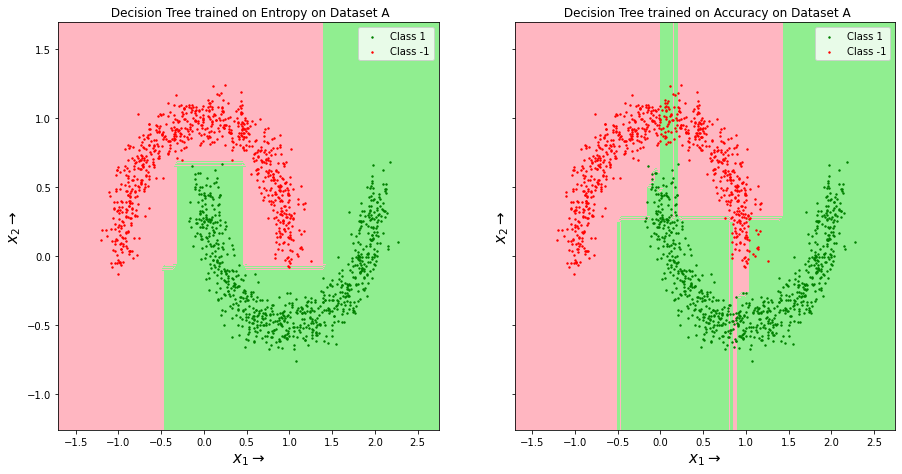

<Figure size 432x288 with 0 Axes>

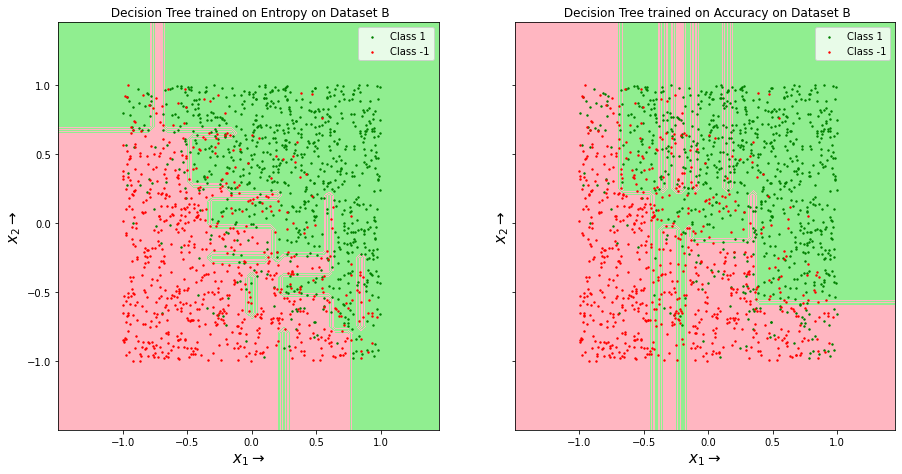

In [0]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2




plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))


dataset = np.load('./dataset_A.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)


tree = DecisionTreeClassifier(num_nodes_stop=1)
tree.fit(X_train, Y_train)
preds = tree.predict(test_samples)
Y_pred = tree.predict(X_test)
ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Decision Tree trained on Entropy on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()


tree = DecisionTreeClassifier(num_nodes_stop=1, criterion='accuracy')
tree.fit(X_train, Y_train)
preds = tree.predict(test_samples)
ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Decision Tree trained on Accuracy on Dataset A')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
plt.show()





plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))


dataset = np.load('./dataset_B.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)


tree = DecisionTreeClassifier(num_nodes_stop=31)
tree.fit(X_train, Y_train)
preds = tree.predict(test_samples)
Y_pred = tree.predict(X_test)
ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Decision Tree trained on Entropy on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()


tree = DecisionTreeClassifier(num_nodes_stop=127, criterion='accuracy')
tree.fit(X_train, Y_train)
preds = tree.predict(test_samples)
ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Decision Tree trained on Accuracy on Dataset B')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
plt.show()

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [0]:
# CodeWrite cell
# Write Random Forest classifier.


class RandomForestClassifier:
    """
    Class for a Random Forest classifier.
    -----------------------------
    Attributes
        n_trees : int, default=1
            number of trees in the random forest classifier
        a : float, default=0.5
            fraction of training data used to train each tree
        b : float, default=0.5
            fraction of features used at each node
        step_size : int, default=2
            thresholds are considered once in each step_size to limit computation
        num_nodes_stop : int, default=1
            number of data points in a node at which we stop splitting further
        criterion : str, default='entropy'
            criterion to split the data during training. can be either 'entropy' or 'accuracy'
        fit : function
            Fits a decision tree for a given training set
        predict : function
            Predicts the outputs for a given set of samples
        entropy : function
            Calculates the entropy for a given split of data
        best_split_entropy : function
            Calculates the best split of the given data based on minimizing entropy
        accuracy : function
            Calculates the accuracy for a given split of data
        best_split_accuracy : function
            Calculates the best split of the given data based on maximizing accuracy
        _grow_tree : function
            Recursively builds a decision tree given a training set and class labels
        _predict : function
            Predict the class label for a SINGLE input
    """
    def __init__(self, num_nodes_stop=1, criterion='entropy', a=0.5, b=0.5, n_trees=1):
        """
        Constructor of the RandomForestClassifier class.
        -----------------------------
        Arguments
            num_nodes_stop : int, default=1
                number of data points in a node at which we stop splitting further
            criterion : str, default='entropy'
                criterion to split the data during training. can be either 'entropy' or 'accuracy'
            n_trees : int, default=1
                number of trees in the random forest
            a : float, default=0.5
                fraction of training data used to train each tree
            b : float, default=0.5
                fraction of features used at each node
        -----------------------------
        Returns
            None
        """
        self.num_nodes_stop = num_nodes_stop
        self.criterion = criterion
        self.a = a
        self.b = b
        self.n_trees = n_trees
        self.step_size = 2
        self.forest = []

    def fit(self, X, y):
        """
        Fits a Random Forest Classifier with n_trees trees for a given training data.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                y[i] = class of the ith training sample
        -----------------------------
        Returns
            None
        """
        self.n_features_ = X.shape[1]
        self.n_datapoints = y.size
        if int(self.n_features_*self.b) < 1 or int(self.n_datapoints*self.a) < 1:
            print("Too sparse samples. Exiting")
            return 0
        elif self.a > 1 or self.b > 1:
            print("Either of a or b is greater than 1. Exiting")
            return 0
        else:
            self.num_features_to_use = int(self.n_features_*self.b)
            self.num_data_points_to_use = int(self.n_datapoints*self.a)
            for n_th_tree in range(self.n_trees):
                datapoints_to_use = np.random.choice(
                    self.n_datapoints, self.num_data_points_to_use, replace=False)
                tree_ = self._grow_tree(
                    X[datapoints_to_use], y[datapoints_to_use])
                self.forest.append(tree_)

    def predict(self, X):
        """
        Predicts the outputs for a given set of samples.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
        -----------------------------
        Returns
            preds : numpy array of size (n,)
                preds[i] is the prediction for the ith data sample
        """
        preds = np.zeros(len(X))
        for i in range(len(X)):
            preds[i] = self._predict(X[i])
        return preds

    def entropy(self, pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points, reg=0.001):
        """
        Calculates the entropy for a given split of data.
        -----------------------------
        Arguments
            pos_points_left : int
                number of 1's to the left of the split
            pos_points_right : int
                number of 1's to the right of the split
            neg_points_left : int
                number of -1's to the left of the split
            neg_points_right : int
                number of -1's to the right of the split
            total_points : int
                total number of points in the split
            reg : float, default=0.001
                regularization parameter to prevent division by zero issues
        Returns
        -----------------------------
            entropy : float
                entropy value for the given split of data
        """

        total_points_left = pos_points_left+neg_points_left
        total_points_right = neg_points_right+pos_points_right
        total_points = total_points+reg
        from numpy import log2
        if pos_points_left*neg_points_left == 0:
            entropy_left = 0
        else:
            entropy_left = -(pos_points_left/total_points_left)*log2(pos_points_left/total_points_left) - \
                (neg_points_left/total_points_left) * \
                log2(neg_points_left/total_points_left)
        if pos_points_right*neg_points_right == 0:
            entropy_right = 0
        else:
            entropy_right = -(pos_points_right/total_points_right)*log2(pos_points_right/total_points_right) - \
                (neg_points_right/total_points_right) * \
                log2(neg_points_right/total_points_right)
        return (total_points_left/total_points)*entropy_left + (total_points_right/total_points)*entropy_right

    def best_split_entropy(self, X, y):
        """
        Calculates the best split of the given data based on minimizing entropy.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                class labels for each sample
        -----------------------------
        Returns
            if n<=num_nodes_stop:
                None, None
            else:
                best_idx : int
                    index of the feature along which the best split occurs
                best_threshold : float
                    value of the corresponding feature along which data is split
        """
        n_features = X.shape[1]
        num_points = y.size
        best_entropy = np.inf
        best_idx, best_threshold = None, None
        if num_points <= self.num_nodes_stop:
            return None, None

        for idx in range(n_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            classes = np.asanyarray(classes)
            total_points = classes.size
            pos_points_left = 1*(classes[0] == 1)
            neg_points_left = 1-pos_points_left
            pos_points_right = np.sum(classes[1:] == 1)
            neg_points_right = total_points-1-pos_points_right
            for i in range(1, num_points):
                current_point_positive = 1*(classes[i] == 1)
                pos_points_left += current_point_positive
                neg_points_left += (1-current_point_positive)
                pos_points_right -= current_point_positive
                neg_points_right -= (1-current_point_positive)
                entropy_ = self.entropy(
                    pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points)
                if thresholds[i] == thresholds[i-1]:
                    continue
                if entropy_ <= best_entropy:
                    best_entropy = entropy_
                    best_idx = idx
                    best_threshold = (thresholds[i]+thresholds[i-1])/2
        return best_idx, best_threshold

    def accuracy(self, pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points, reg=0.001):
        """
        Calculates the accuracy for a given split of data.
        -----------------------------
        Arguments
            pos_points_left : int
                number of 1's to the left of the split
            pos_points_right : int
                number of 1's to the right of the split
            neg_points_left : int
                number of -1's to the left of the split
            neg_points_right : int
                number of -1's to the right of the split
            total_points : int
                total number of points in the split
        Returns
        -----------------------------
            accuracy : float
                max(neg_points_left, pos_points_left) + max(neg_points_right, pos_points_right)
        """
        acc1 = max(neg_points_left, pos_points_left)
        acc2 = max(neg_points_right,pos_points_right)
        return acc1+acc2

    def best_split_accuracy(self, X, y):
        """
        Calculates the best split of the given data based on maximizing accuracy.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                class labels for each sample
        -----------------------------
        Returns
            if n<=num_nodes_stop:
                None, None
            else:
                best_idx : int
                    index of the feature along which the best split occurs
                best_threshold : float
                    value of the corresponding feature along which data is split
        """
        n_features = X.shape[1]
        num_points = y.size
        best_acc = 0
        best_idx, best_threshold = None, None
        if num_points <= self.num_nodes_stop:
            return None, None

        for idx in range(n_features):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            classes = np.asanyarray(classes)
            total_points = classes.size
            pos_points_left = 1*(classes[0] == 1)
            neg_points_left = 1-pos_points_left
            pos_points_right = np.sum(classes[1:] == 1)
            neg_points_right = total_points-1-pos_points_right
            for i in range(1, num_points, self.step_size):
                current_point_positive = 1*(classes[i] == 1)
                pos_points_left += current_point_positive
                neg_points_left += (1-current_point_positive)
                pos_points_right -= current_point_positive
                neg_points_right -= (1-current_point_positive)
                accuracy_ = self.accuracy(
                    pos_points_left, pos_points_right, neg_points_left, neg_points_right, total_points)
                if thresholds[i] == thresholds[i-1]:
                    continue
                if accuracy_ > best_acc:
                    best_acc = accuracy_
                    best_idx = idx
                    best_threshold = (thresholds[i]+thresholds[i-1])/2
        return best_idx, best_threshold

    def _grow_tree(self, X, y):
        """
        Recursively builds a decision tree given training data and class labels.
        -----------------------------
        Arguments
            X : numpy array of size (n,m)
                n = number of samples
                m = dimension of each sample
            y : numpy array of size (n,)
                class labels for each sample
        -----------------------------
        Returns
            node : Node
                A Decision tree classifier for the given fraction of the data
        """
        if np.sum(y) >= 0:
            predicted_class = 1
        else:
            predicted_class = -1
        node = Node(predicted_class=predicted_class)

        if len(set(y)) <= 1:
            return node

        if y.size > self.num_nodes_stop:
            indices_of_features_to_use = np.random.choice(
                self.n_features_, self.num_features_to_use, replace=False)
            if self.criterion == 'entropy':
                idx, thr = self.best_split_entropy(
                    X[:, indices_of_features_to_use], y)
            else:
                idx, thr = self.best_split_accuracy(
                    X[:, indices_of_features_to_use], y)
            if idx is not None:
                idx = indices_of_features_to_use[idx]
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left)
                node.right = self._grow_tree(X_right, y_right)
        return node

    def _predict(self, inputs):
        """
        Predict the class label for a SINGLE input.
        -----------------------------
        Arguments
            inputs : numpy array of size (m,)
                a SINGLE data point
        -----------------------------
        Returns
            predicted_class : int
                predicted class for the given data point
        """
        forest_ = self.forest
        predictions = np.zeros(self.n_trees)
        for nth_tree in range(self.n_trees):
            node = forest_[nth_tree]
            while node.left:
                if inputs[node.feature_index] < node.threshold:
                    node = node.left
                else:
                    node = node.right
            predictions[nth_tree] = node.predicted_class
        if np.sum(predictions) >= 0:
            return 1
        else:
            return -1


In [0]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.


def calculate_best_number_of_trees(criterion='entropy'):
    """
    Prints the best number of trees in a random forest for a given splitting 
    criterion along with the training errors, validation errors and test errors.
    -----------------------------
    Arguments
        criterion : str, default='entropy'
            criterion to split the data during training
    -----------------------------
    Returns
        None
    """
    number_of_trees = [1, 10, 20, 40, 80, 160, 320, 640]
    datasets = ['./dataset_A.npz', './dataset_B.npz',
                './dataset_C.npz', './dataset_D.npz']

    train_errors = np.zeros((len(datasets),  len(number_of_trees)))
    val_errors = np.zeros_like(train_errors)

    for dataset_number in range(len(datasets)):
        dataset = np.load(datasets[dataset_number])
        X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
        pos_points = np.sum(Y_train == 1)
        X_train_, Y_train_ = np.zeros_like(X_train), np.zeros_like(Y_train)
        Y_train_ = Y_train_-1
        Y_train_[:pos_points] = 1
        X_train_[:pos_points] = X_train[Y_train == 1]
        X_train_[pos_points:] = X_train[Y_train == -1]
        validation_indices = np.arange(0, Y_train.size, 4)
        X_val = X_train_[validation_indices]
        Y_val = Y_train_[validation_indices]
        X_train = np.delete(X_train_, validation_indices, axis=0)
        Y_train = np.delete(Y_train_, validation_indices)
        for tree_size_number in range(len(number_of_trees)):
            forest = RandomForestClassifier(
                n_trees=number_of_trees[tree_size_number], criterion=criterion)
            forest.fit(X_train, Y_train)
            train_preds = forest.predict(X_train)
            val_preds = forest.predict(X_val)
            train_error = np.sum(train_preds != Y_train)/Y_train.size
            val_error = np.sum(val_preds != Y_val)/Y_val.size
            train_errors[dataset_number, tree_size_number] = np.round(
                100*train_error, decimals=2)
            val_errors[dataset_number, tree_size_number] = np.round(
                100*val_error, decimals=2)

    best_n_trees_vals = np.argmin(val_errors, axis=1)
    best_num_trees = []
    for i in range(len(datasets)):
        best_num_trees.append(
            tuple([datasets[i][:-4], number_of_trees[best_n_trees_vals[i]]]))


    from tabulate import tabulate
    number_of_trees = ['Number of Trees', '1',
                       '10', '20', '40', '80', '160', '320', '640']
    datasets = ['dataset A', 'dataset B', 'dataset C', 'dataset D']

    train_errors_ = list(train_errors.copy())
    val_errors_ = list(val_errors.copy())
    for i in range(len(train_errors_)):
        train_errors_[i] = list(train_errors_[i])
        val_errors_[i] = list(val_errors_[i])
        train_errors_[i].insert(0, datasets[i])
        val_errors_[i].insert(0, datasets[i])

    print("\t\t\t\t\tPercentage Train Errors\t\t\t\t\t")
    print(tabulate(train_errors_, headers=number_of_trees, tablefmt='fancy_grid'))
    print("\t\t\t\t\tPercentage Validation Errors\t\t\t\t\t")
    print(tabulate(val_errors_, headers=number_of_trees, tablefmt='fancy_grid'))

    print("Best number of trees for each dataset.")
    print(best_num_trees)

    for entry in best_num_trees:
        dataset = np.load(entry[0]+'.npz')
        X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
        forest = RandomForestClassifier(n_trees=entry[1], criterion=criterion)
        forest.fit(X_train, Y_train)
        test_preds = forest.predict(X_test)
        error = np.round(100*np.sum(test_preds != Y_test) /
                         Y_test.size, decimals=2)
        print(f"Dataset :{entry[0][-1]}\tPercentage Test Error: {error}")

# Note that the random forest classifiers give different best hyperparameters and accuracies
# on each run. The values mentioned are for one such run
        
# calculate_best_number_of_trees() takes ~3500 seconds on an Intel i7-7700HQ
calculate_best_number_of_trees()
# calculate_best_number_of_trees(criterion='accuracy') takes ~2400 seconds on an Intel i7-7700HQ
calculate_best_number_of_trees(criterion='accuracy')


<center><b>Criterion: Entropy</b></center>
<table>
<tr><th><center><b>Percentage Training Error</b></center></th><th><center><b>Percentage Validation Error</b></center></th></tr>
<tr><td>

|     Number of Trees     	|    1   	|    10   	|    20    	|    40    	|    80    	|    160   	|   320   |   640   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A         |  0.71 | 0.09 | <b>0</b>    | 0    | 0    |  0    |  0    |  0    |
| dataset B         | 11.47 | 3.29 | 3.11 | 1.87 | 2.58 |  <b>0.53</b> |  0.71 |  0.98 |
| dataset C         |  4.18 | 0.62 | 0.18 | <b>0</b>    | 0    |  0    |  0    |  0    |
| dataset D         |  4.33 | 0.67 | 0.67 | <b>0</b>    | 0.33 |  0    |  0.33 |  0    |

</td><td>


|     Number of Trees     	|    1   	|    10   	|    20    	|    40    	|    80    	|    160   	|   320   |   640   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A         |  1.07 |  <b>0.27</b> |  0.27 |  0.27 |  0.27 |  0.27 |  0.27 |  0.27 |
| dataset B         | 24    | 19.47 | 18.13 | <b>16.53</b> | 18.4  | 16.53 | 17.33 | 16.8  |
| dataset C         | 10.4  |  5.07 |  4.53 |  <b>3.2</b>  |  4.27 |  4.27 |  4.27 |  4    |
| dataset D         |  6    |  7    |  5    |  7    |  5    |  5    |  <b>4</b>    |  6    |
 </td></tr> </table>

 <br />

 | Dataset 	|  Number of Trees 	| Percentage Test Error  	|
|:------------:	|:--------------:	|:----------:	|
|      A     	|        10      	|     0.4   	|
|      B     	|        40      	|    21.0    	|
|      C     	|       40  	|    4.38|
|     D     	|       320      	|    2.96    	|




<center><b>Criterion: Accuracy</b></center>
<table>
<tr><th><center><b>Percentage Training Error</b></center></th><th><center><b>Percentage Validation Error</b></center></th></tr>
<tr><td>

|     Number of Trees     	|    1   	|    10   	|    20    	|    40    	|    80    	|    160   	|   320   |   640   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A         |  4.09 | 0.27 | 0.27 | 0.18 | 0.09 |  <b>0</b>    |  0    |  0.09 |
| dataset B         | 14.58 | 4.98 | 3.29 | 2.93 | 1.24 |  1.33 |  <b>0.98</b> |  0.98 |
| dataset C         |  6.93 | 0.09 | 0.09 | <b>0</b>    | 0    |  0    |  0    |  0    |
| dataset D         |  3.67 | 0.67 | 1    | <b>0</b>    | 0.33 |  0    |  0.33 |  0    |

</td><td>


|     Number of Trees     	|    1   	|    10   	|    20    	|    40    	|    80    	|    160   	|   320   |   640   |
|:---------:	|:---------:	|:----------:	|:----------:	|:----------:	|:---------:	|:--------:	|:--------:	|:--------:	|
| dataset A         |  7.47 |  1.87 |  0.8  |  <b>0.53</b> |  1.6 |  0.53 |  0.53 |  0.53 |
| dataset B         | 22.13 | 18.4  | 18.67 | 19.73 | 18.4 | 18.13 | <b>17.87</b> | 18.67 |
| dataset C         | 16    |  5.87 |  5.87 |  <b>5.33</b> |  5.6 |  6.13 |  5.87 |  6.4  |
| dataset D         | 13    |  9    |  8    |  <b>5</b>    |  6   |  7    |  6    |  6    |
 </td></tr> </table>

 <br />

 | Dataset 	|  Number of Trees 	| Percentage Test Error  	|
|:------------:	|:--------------:	|:----------:	|
|      A     	|        40      	|     2.4   	|
|      B     	|        320      	|    21.0    	|
|      C     	|       40  	|    7.07|
|     D     	|       40      	|    2.96    	|

## Observations
- Like in the case of decision trees, random forests trained with entropy tend to do better than random forests trained using accuracy. The difference, however, is not a lot except in the case of dataset A. This can be explained using the same logic as why decision trees trained using entropy do better than the ones trained using accuracy.
- Unlike decision trees, it is much harder to interpret training error in the case of random forests. This is especially when the number of trees is low. Since each tree gets to see only a fraction of the training data(0.5 in our case), it is hard to claim anything as to how well the forest has trained.
- Datasets B and D see significant jumps in performance compared to that achieved using a decision tree. As we are averaging the output of so many trees, a random forest with relatively high number of trees is quite good at modeling a smooth boundary. 
- However, in general the training error reduces as we increase the number of trees. In general, bagging reduces the prediction variance to almost nothing, improving the accuracy of the classifier. It is expected that increasing the number of individual randomized models in bagging will not increase the generalization error.
- The best performing random forests do better than the best performing decision trees across datasets and splitting criterion.
- Both the training and validation errors are highest when we use only one tree. This is expected as the tree having trained on only half the data and half the set of available features, will neither fit the data well nor generalize to unseen data. 

## Hyper-parameter selection
- The hyperparameter corresponding to the bold values in the table of validation errors was chosen for each dataset.
- The number of trees was chosen using a carefully selected validation set. It was constructed by concatenating the points corresponding to y=-1 after points corresponding to y=1 and then choosing every 4th sample. This was done to ensure that the validation set has the same percentage of positive and negative points as the training set.
- For datasets A and B, it was verified by plotting scatter plots of the training and validation set to ensure that the validation set is representative of the training set.
- For datasets C and D, the implicit assumption is that such a choice of a validation set is representative of the training data. It is hard to verify this assumption as those cannot be plotted.
- Unlike the case of decision trees, a full k fold cross validation could not be performed here as that would take too much time given the fact that we are going upto 640 trees.

<Figure size 432x288 with 0 Axes>

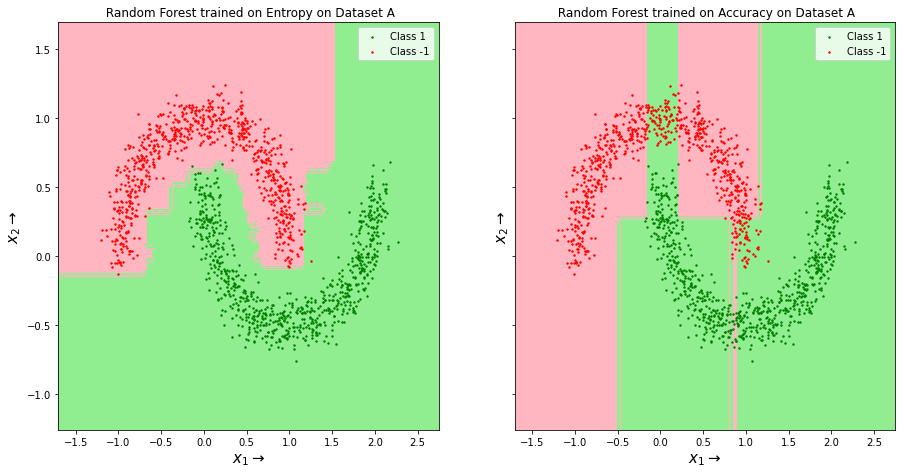

<Figure size 432x288 with 0 Axes>

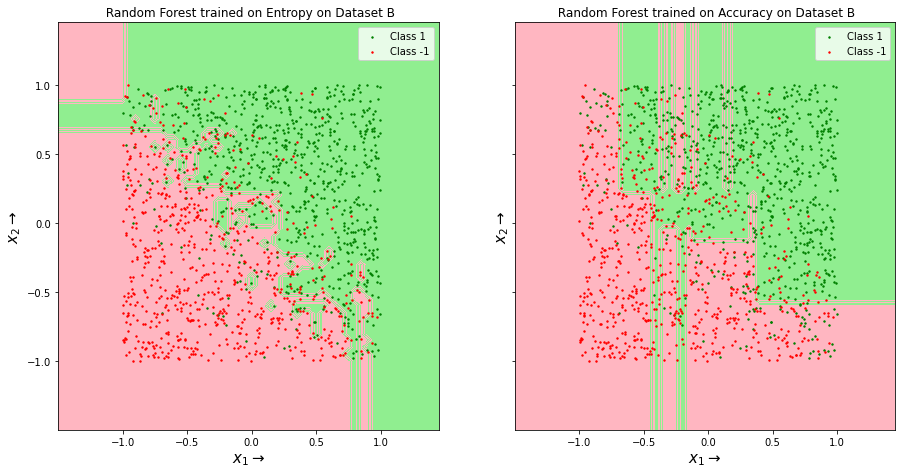

In [0]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 



plt.figure(0)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))


dataset = np.load('./dataset_A.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)


forest = RandomForestClassifier(n_trees=10)
forest.fit(X_train, Y_train)
preds = forest.predict(test_samples)
Y_pred = forest.predict(X_test)
ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Random Forest trained on Entropy on Dataset A')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()

forest = RandomForestClassifier(n_trees=40, criterion='accuracy')
tree.fit(X_train, Y_train)
preds = tree.predict(test_samples)
ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Random Forest trained on Accuracy on Dataset A')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
plt.show()



plt.figure(1)
f, (ax1,ax2) = plt.subplots(1,2,sharex=False,sharey=True,figsize=(15,7.5))

dataset = np.load('./dataset_B.npz') 
X_train, Y_train, X_test, Y_test = dataset['arr_0'], dataset['arr_1'], dataset['arr_2'], dataset['arr_3']
X_min, X_max  = np.min(X_train, axis= 0), np.max(X_train, axis= 0)
X,Y = np.meshgrid(np.arange(X_min[0]-0.5,X_max[0]+0.5,0.05),np.arange(X_min[1]-0.5,X_max[1]+0.5,0.05))
test_samples= np.concatenate([X.reshape(-1,1),Y.reshape(-1,1)],axis=1)

forest = RandomForestClassifier(n_trees=40)
forest.fit(X_train, Y_train)
preds = forest.predict(test_samples)
Y_pred = forest.predict(X_test)
ax1.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax1.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax1.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax1.set_title(' Random Forest trained on Entropy on Dataset B')
ax1.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax1.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax1.legend()

forest = RandomForestClassifier(n_trees=320, criterion='accuracy')
tree.fit(X_train, Y_train)
preds = tree.predict(test_samples)
ax2.contourf(X,Y,preds.reshape(X.shape),colors=['lightpink','lightgreen'])
ax2.scatter(X_train[Y_train==1][:,0],X_train[Y_train==1][:,1],s=2,c='g',label='Class 1')
ax2.scatter(X_train[Y_train==-1][:,0],X_train[Y_train==-1][:,1],s=2,c='r',label='Class -1')
ax2.set_title(' Random Forest trained on Accuracy on Dataset B')
ax2.set_xlabel(r'$x_{1}\rightarrow$',size=15)
ax2.set_ylabel(r'$x_{2}\rightarrow$',size=15)
ax2.legend()
plt.show()